ANALYSIS ON INDIAN STARTUP ECOSYSTEM FROM 2018-2021.

## Business Objective: 
The objective for this project is to analyze the funding data of Indian start-ups from the years 2018 to 2021 to gain a deep understanding of the financial landscape within the Indian start-up ecosystem. The primary focus is to identify the sectors or industries that have consistently demonstrated significant growth potential and attractiveness for investments. This analysis will serve as the foundation for making strategic decisions regarding entry or expansion into the Indian start-up ecosystem, ensuring that resources are directed towards the most promising areas that offer the best prospects for success and return on investment.
1.	Hypothesis 1: Funding Amount Growth
•	Null Hypothesis (H0): The average funding amount for startups in India has remained constant from 2018 to 2021.
•	Alternative Hypothesis (H1): The average funding amount for startups in India has increased from 2018 to 2021.

In [1]:
#%pip install pyodbc
#%pip install python-dotenv

In [2]:
#Import necessary packages
import pyodbc 
from dotenv import dotenv_values 
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('configuration.env')
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
#Establishing connection to the database
connection = pyodbc.connect(connection_string)

Step one: Getting data from the various data sources. i.e Server and the CSV files.

In [5]:
#Getting the 2018 data
data2018 = pd.read_csv('data_sources/startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [6]:
#Getting the 2019 data
data2019 = pd.read_csv('data_sources/startup_funding2019.csv')
data2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [7]:
#Getting the 2020 data from the server
query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [8]:
#Getting the 2021 data from the server
query = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query, connection)
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


EDA & Cleaning up the 2018 data

In [9]:
#Getting the 2018 info
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [10]:
#Checking for the shape of the data in 2018.
data2018.shape

(526, 6)

In [11]:
#Checking for any null values from the 2018 dataset.
Null_values = data2018.isnull().sum()
print(Null_values)

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64


In [12]:
#Check for duplicate values in 2018 data frame
duplicate = data2018[data2018.duplicated()] 
print(duplicate)

        Company Name                                           Industry  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
348  TheCollegeFever is a hub for fun, fiesta and f...  


In [13]:
#Finding out more about the duplicate values.
data2018[data2018['Company Name'] == "TheCollegeFever"]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [14]:
#Dropping duplicate values in 2018 dataframe.
data2018.drop_duplicates()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [15]:
#Check for missing values
data2018.isna().any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

In [16]:
#Dropping the columns Founded and Founders
data2018.drop(['About Company'], axis=1, inplace=True)

In [17]:
#Cleaning up of the amount column. 
# Function to convert Indian Rupee to USD
def convert_to_usd(Amount):
    #Exchange rate of 0.014. 1 rupee = 0.014$ 
    exchange_rate = 0.014
    return Amount * exchange_rate
 
# Function to classify and convert undeclared values
def classify_and_convert(row):
    if '₹' in row['Amount']:
        amount_str = row['Amount'][1:].replace(',', '')  # Remove commas
        return convert_to_usd(float(amount_str))  # Extract amount and convert to float
    elif '$' in row['Amount']:
        amount_str = row['Amount'][1:].replace(',', '')  # Remove commas
        return float(amount_str)  # Extract amount and convert to float
    elif '—' in row['Amount']:
        return np.nan  # Replace '-' with NaN
    else:
        threshold = 10000000.0  #Treshold is the figure for which values above it are considered Rupees, while those below it are considered usd.
        if float(row['Amount']) >= threshold:
            return convert_to_usd(float(row['Amount']))
        else:
            return float(row['Amount']) 
 
 #Function to create a new column 'Amount$' which holds the cleaned up values
data2018['Amount($)'] = data2018.apply(classify_and_convert, axis=1)
 



In [18]:
#Check whether values have been converted for the new dataframe
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",560000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",910000.0
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",NaN


In [19]:
#Sampling various data entries to confirm the values were accurately converted
data2018.sample()

,Company Name,Industry,Round/Series,Amount,Location,Amount($)
197,SectorQube,"Consumer Electronics, Embedded Systems, Hardwa...",Seed,—,"Ernakulam, Kerala, India",NaN


In [20]:
# Drop the 'Amount' column and display the cleaned DataFrame and remain with the new 'Amount($)'
data2018.drop('Amount', axis=1, inplace=True)

In [21]:
#Drop all Null values on the column amount.
data2018.dropna(subset=['Amount($)'], inplace=True)

In [22]:
#Checking for unique values on the Round of funding of the dataset to be able to clean up the column
data2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Private Equity',
       'Venture - Series Unknown', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Series H', 'Series C', 'Series E', 'Pre-Seed',
       'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Corporate Round', 'Post-IPO Equity',
       'Secondary Market', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

In [23]:
#Grouping the Stages of funding to a more precise grouping and converting those that cant be classified to nan
data2018['Round/Series'].replace(to_replace={ 'Secondary Market': 'Equity','Corporate Round' : np.nan, 'Funding Round' : np.nan,  'Private Equity' : 'Equity', 'Post-IPO Debt' : 'Debt Financing', 'Post-IPO Equity' : 'Equity', 'Non-equity Assistance' : np.nan, 'Pre-Seed' : 'Seed', 'Undisclosed' : np.nan, 'Venture - Series Unknown' : np.nan, 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' : np.nan,}, inplace=True)

In [24]:
#Checking for the new unique categories in the stages of funding column.
data2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Equity', nan, 'Grant',
       'Debt Financing', 'Series H', 'Series C', 'Series E', 'Series D'],
      dtype=object)

In [25]:
#Check for the distribution of the various stages of funding
data2018['Round/Series'].value_counts()

Round/Series
Seed              179
Series A           64
Angel              21
Series B           19
Debt Financing     15
Series C           15
Equity             13
Series E            5
Grant               3
Series D            3
Series H            1
Name: count, dtype: int64

EDA and CLEANING UP THE 2019 DATA

In [26]:
#EDA on 2019 data
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [27]:
#Checking for null values
data2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [28]:
#Check for duplicate values
duplicate = data2019[data2019.duplicated()] 
print(duplicate)

Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage]
Index: []


In [29]:
#Clean up of the amount column by dropping $ sign, replace 'Undisclosed' with Nan, and removing the ','s
data2019['Amount($)'] = pd.to_numeric(data2019['Amount($)'].replace('Undisclosed', np.nan).str.replace('[$,]', '', regex=True))


In [30]:
#Drop all Null values on the column amount for 2020 data
data2019.dropna(subset=['Amount($)'], inplace=True)

In [31]:
#Dropping the columns Founded and Founders
data2019.drop(['Founded','Founders', 'What it does'], axis=1, inplace=True)

In [32]:
#identifying the unique values in the stage column to group them properly.
data2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [33]:
#Grouping the Stages of funding
data2019['Stage'].replace(to_replace={'Pre-series A' : 'Series A', 'Pre series A' : 'Series A', 'Fresh funding' : 'Seed', 'Post series A' : 'Series A', 'Seed funding' : 'Seed', 'Seed fund' : 'Seed', 'Seed round' : 'Seed', 'Series B+' : 'Series B'}, inplace=True)

In [34]:
#Check if code has been executed properly.
data2019['Stage'].unique()

array([nan, 'Series C', 'Seed', 'Series D', 'Series A', 'Series G',
       'Series B', 'Series E', 'Series F'], dtype=object)

In [35]:
#Check for the distribution of the values in the  stage column.
data2019['Stage'].value_counts()

Stage
Series A    19
Series B     7
Seed         4
Series D     4
Series C     3
Series G     1
Series E     1
Series F     1
Name: count, dtype: int64

In [36]:
#Check for the info of the 2019 data set.
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 88
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  77 non-null     object 
 1   HeadQuarter    61 non-null     object 
 2   Sector         72 non-null     object 
 3   Investor       77 non-null     object 
 4   Amount($)      77 non-null     float64
 5   Stage          40 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.2+ KB


In [37]:
#sampling the 2019 data to check the implementation of the changes.
data2019.sample()

,Company/Brand,HeadQuarter,Sector,Investor,Amount($),Stage
70,Zebu,NaN,Cybersecurity,Undisclosed,4000000.0,Seed


EDA & Clean up of 2020 data

In [38]:
#Check for the shape of the data
data2020.shape

(1055, 10)

In [39]:
#Checking for the information of the 2020 dataset
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [40]:
#Checking for null values
data2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [41]:
#Drop all Null values on the column amount for 2020 data
data2020.dropna(subset=['Amount'], inplace=True)

In [42]:
#Dropping the columns Founded and Founders
data2020.drop(['Founded','Founders','column10','What_it_does'], axis=1, inplace=True)

In [43]:
data2020.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Stage
0,Aqgromalin,Chennai,AgriTech,Angel investors,200000.0,None
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed
3,NCOME,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,None
5,qZense,Bangalore,AgriTech,"Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed


In [44]:
#Check for duplicate values
duplicate = data2020[data2020.duplicated()] 
print(duplicate)

    Company_Brand HeadQuarter                 Sector  \
145     Krimanshi     Jodhpur  Biotechnology company   
362        Byju’s   Bangalore                 EdTech   

                                           Investor       Amount Stage  
145  Rajasthan Venture Capital Fund, AIM Smart City     600000.0  Seed  
362           Owl Ventures, Tiger Global Management  500000000.0  None  


In [ ]:
#Check for unique values in the stage column of the dataset.
data2020['Stage'].unique()

In [ ]:
#Grouping the Stages of funding
data2020['Stage'].replace(to_replace={'' : np.nan,'Edge' : np.nan, 'Mid series' : np.nan,'Series C, D': np.nan, 'Bridge Round' : np.nan, 'Series B2' : 'Series B','Series E2' : 'Series E', 'Series A-1' : 'Series A', 'Series D1' : 'Series D', 'Seed Round & Series A' : np.nan,'Pre series C' : 'Series C','Pre-Series B' : 'Series B','Pre series B' : 'Series B','Pre- series A' : 'Series A','Pre series A1' : 'Series A','Pre Series A' : 'Series A','Seed A' : 'Seed','Pre seed round' : 'Seed','Pre-Seed' : 'Seed','Seed Funding' : 'Seed', 'Seed Investment' : 'Seed','Seed Round' : 'Seed','Pre seed Round' : 'Seed','Pre-seed Round' : 'Seed', 'Pre-series B' : 'Series B', 'Pre-series C' : 'Series C', 'Pre-seed' : 'Seed', 'Debt':'Debt Financing', 'Pre-series A' : 'Series A', 'Pre series A' : 'Series A', 'Fresh funding' : 'Seed', 'Post series A' : 'Series A', 'Seed funding' : 'Seed', 'Seed fund' : 'Seed', 'Seed round' : 'Seed', 'Series B+' : 'Series B', 'Angel Round': 'Angel',}, inplace=True)

In [ ]:
#Checking for unique values in the stage column of 2020.
data2020['Stage'].unique()

array([None, 'Seed', 'Series A', 'Series C', 'Series B', 'Debt Financing',
       'Series E', 'Series D', 'Bridge', 'Series F', nan, 'Series H',
       'Angel'], dtype=object)

In [ ]:
#checking the distribution of the 2020 stage entries.
data2020['Stage'].value_counts()

Stage
Series A          180
Seed              122
Series B           65
Series C           50
Series D           23
Debt Financing     18
Series E            7
Bridge              4
Series F            4
Series H            1
Angel               1
Name: count, dtype: int64

EDA & Clean up of 2021 data

In [45]:
#Dropping the columns Founded and Founders
data2021.drop(['Founded','Founders','What_it_does'], axis=1, inplace=True)

In [47]:
#Code to drop $ sign, replace 'Undisclosed' with Nan, and removing the ','s
data2021['Amount'] = data2021['Amount'].replace('[\$,]', '', regex=True).replace(['Pre-series A','Undisclosed','Upsparks','J0','undisclosed','ah! Ventures','ITO Angel Network LetsVenture', 'LetsVenture','JITO Angel Network','Series C','Seed',' None'],0, regex=True).replace('', np.nan , regex=True)
data2021['Amount'].astype(float) #Converting the column amount to float

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1209, dtype: float64

In [48]:
#Cleam up of the amount column in the dataset.
data2021['Amount'].replace(to_replace={'0' : np.nan}, inplace=True)

In [49]:
#Drop all Null values on the column amount for 2021 data
data2021.dropna(subset=['Amount'], inplace=True)

In [51]:
#Check for unique values on the stage column.
data2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$1000000',
       'Seies A', 'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [52]:
#Grouping the Stages of funding in the stage column.
data2021['Stage'].replace(to_replace={'Series F2' : 'Series F','Series D1' : 'Series D','Series B3' : 'Series B','Series F1' : 'Series F','Series A+' : 'Series A', 'Pre-series A1' : 'Series A', 'Pre-series A' : 'Series A', 'Series A2' : 'Series A','Seies A' : 'Series A', 'Seed+' : 'Seed', 'Early seed' : 'Seed', 'Seed fund' : 'Seed', 'Pre-seed' : 'Seed', 'Pre-series B' : 'Series B', 'PE' : np.nan, '$1000000' : np.nan, '$300000' : np.nan, 'Pre-series' : np.nan, '$1200000' : np.nan, 'Series I': np.nan, 'Debt' : 'Debt Financing'}, inplace=True)

In [53]:
#Checking for the actual clean up of the stages column.
data2021['Stage'].unique()

array(['Series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Debt Financing', nan, 'Bridge', 'Series F',
       'Series G', 'Series H'], dtype=object)

In [54]:
#Checking for the distribution of the various entries based on the stage column.
data2021['Stage'].value_counts()

Stage
Seed              295
Series A          290
Series B           60
Series C           45
Debt Financing     27
Series D           22
Series E           17
Series F            8
Bridge              2
Series G            2
Series H            2
Name: count, dtype: int64

In [ ]:
#Sample of the 2021 data.
data2021.sample()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Stage
843,Disruptium,Ahmadabad,Consulting,Pravesh Mehta,"$200,000",None


Renaming of all columns on the 4 datasets to map out uniform columns.

In [59]:
#Creating dictionary mapping old column names to new column names for 2021 dataset.
column_mapping_2021= {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'} 
#Rename multiple columns using the rename() method
data2021.rename(columns=column_mapping_2021, inplace=True)

In [60]:
#Creating dictionary mapping old column names to new column names for 2020 dataset
column_mapping_2020 = {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'} 
# Rename multiple columns using the rename() method
data2020.rename(columns=column_mapping_2020, inplace=True)

In [61]:
#Creating dictionary mapping old column names to new column names for 2019 dataset.
column_mapping_2019 = {'Company/Brand': 'Company_Name'} 
data2019.rename(columns=column_mapping_2019, inplace=True) # Rename multiple columns using the rename() method

In [62]:
#Creating dictionary mapping old column names to new column names for 2018 dataset.
column_mapping_2018 = {'Company Name': 'Company_Name', 'Industry': 'Sector', 'Round/Series':'Stage', 'Location':'HeadQuarter'}
# Rename multiple columns using the rename() method
data2018.rename(columns=column_mapping_2018, inplace=True)

In [64]:
#Reordering the columns in the 2018 data set to match the rest of the data sets. 
new_order = ['Company_Name', 'HeadQuarter', 'Sector',  'Amount($)', 'Stage']
data2018= data2018[new_order]

In [65]:
#Check for the head of the cleaned up data.
data2018.head()

,Company_Name,HeadQuarter,Sector,Amount($),Stage
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000.0,Seed
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",560000.0,Seed
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",910000.0,Series A
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000.0,Angel
5,Hasura,"Bengaluru, Karnataka, India","Cloud Infrastructure, PaaS, SaaS",1600000.0,Seed


In [66]:
#Check for the head of the 2019 data.
data2019.head()

,Company_Name,HeadQuarter,Sector,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Ecommerce,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,Mumbai,Edtech,General Atlantic,150000000.0,Series C
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Seed
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,NaN


In [67]:
#Check for the head of the 2020 data.
data2020.head()

,Company_Name,HeadQuarter,Sector,Investor,Amount($),Stage
0,Aqgromalin,Chennai,AgriTech,Angel investors,200000.0,None
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0,Seed
3,NCOME,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,None
4,Gramophone,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,None
5,qZense,Bangalore,AgriTech,"Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed


In [68]:
#Check for the head of the 2021 data.
data2021.head()

,Company_Name,HeadQuarter,Sector,Investor,Amount($),Stage
0,Unbox Robotics,Bangalore,AI startup,"BEENEXT, Entrepreneur First",1200000,Series A
1,upGrad,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management",120000000,None
2,Lead School,Mumbai,EdTech,"GSV Ventures, Westbridge Capital",30000000,Series D
3,Bizongo,Mumbai,B2B E-commerce,"CDC Group, IDG Capital",51000000,Series C
4,FypMoney,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed


Merging the four datasets into one data frame.

In [69]:
#Creation of the column year to be the new unique identifier for the dataset by year.
data2018['Year'] = 2018
data2019['Year'] = 2019
data2020['Year'] = 2020
data2021['Year'] = 2021

# Merge DataFrames
merged_data = pd.concat([data2018, data2019, data2020, data2021], ignore_index=True)


In [71]:
#Check for the head of the meged dataset.
merged_data.head()

,Company_Name,HeadQuarter,Sector,Amount($),Stage,Year,Investor
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000.0,Seed,2018,NaN
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming",560000.0,Seed,2018,NaN
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",910000.0,Series A,2018,NaN
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000.0,Angel,2018,NaN
4,Hasura,"Bengaluru, Karnataka, India","Cloud Infrastructure, PaaS, SaaS",1600000.0,Seed,2018,NaN


In [89]:
#Check for the shape of the merfed data set.
merged_data.shape

(2460, 7)

In [95]:
#Statistics for the amount column.
merged_data.describe()

,Amount($)
count,2.460000e+03
mean,1.131827e+08
std,3.337868e+09
min,0.000000e+00
25%,6.000000e+05
50%,2.200000e+06
75%,1.000000e+07
max,1.500000e+11


In [74]:
#Verification of the nulls on the cleaned data
merged_data.isnull().sum()

Company_Name      0
HeadQuarter      94
Sector           16
Amount($)         0
Stage           837
Year              0
Investor        466
dtype: int64

In [75]:
#Export the concatenated DataFrame to a CSV file
merged_data.to_csv('LP1_Merged_data.csv', index=False)

1.	What is the overall trend in startup funding from 2018 to 2021?
•	Are there significant changes in the total funding amount over the years?
2.	Which sectors received the most funding, and has this changed over time?
•	Can we identify any sectors that have experienced substantial growth in funding?
3.	Did the number of startups funded increase or decrease over the years?
•	Is there evidence of a growing or shrinking startup ecosystem?
4.	Are there any yearly patterns in funding activity?
•	Do certain years stand out in terms of funding activity?
5.	Are there any outliers or anomalies in the data that require further investigation?
•	Are there startups that received exceptionally high or low funding compared to their peers?


In [77]:
#Conversion of the column amount to float and year to object
merged_data['Amount($)'] = merged_data['Amount($)'].astype(float)
merged_data['Year'] = merged_data['Year'].astype(str)

In [78]:
merged_data.dtypes

Company_Name     object
HeadQuarter      object
Sector           object
Amount($)       float64
Stage            object
Year             object
Investor         object
dtype: object

In [96]:
#Check for the count of the various funding stages across the years.
merged_data['Stage'].value_counts(dropna=False)

Stage
None              748
Seed              600
Series A          553
Series B          151
Series C          113
NaN                89
Debt Financing     60
Series D           52
Series E           30
Angel              22
Equity             13
Series F           13
Bridge              6
Series H            4
Grant               3
Series G            3
Name: count, dtype: int64

Analysis Questions.

1. What is the sum of funding across the years?


A bar graph is used here to visualize the sum of the funding across the four years. It is evident that the funding is higher in 2020 and 2021. This could be linked to the pandemic that was experienced in these years (Covid-19).

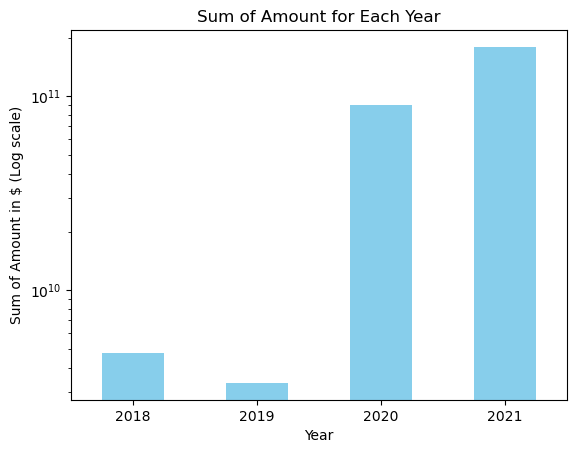

In [79]:
import matplotlib.pyplot as plt
# Group by "Unique_ID" and sum the "Amount" for each year
sum_by_year = merged_data.groupby('Year')['Amount($)'].sum()
# Plot a bar graph
sum_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Sum of Amount in $ (Log scale)')
plt.title('Sum of Amount for Each Year')
plt.yscale('log') 
plt.xticks(rotation=0)
plt.show()

In [80]:
#This gives the amount of funding for each of the 4 years in $.
print(sum_by_year)

Year
2018    4.732229e+09
2019    3.336433e+09
2020    9.054742e+10
2021    1.798134e+11
Name: Amount($), dtype: float64


Question 2:

How does the distribution of funding amount vary across different stages?

In 2018 the funding that is quite prevalent is Angel, debt financing and Equity at an almost equal share. This means that the startup ecosystem was quite balanced, with not much of start ups struggling.
In 2019, there is a good share of seed and series funding which is more of a second or third etc round of funding. this could point towards the start ups scaling up and thus the need for more funding. 
In 2020, we see the Debt financing creeping back in indicative of a struggle in the start ups which could be attributed to the pandemic that was being faced.

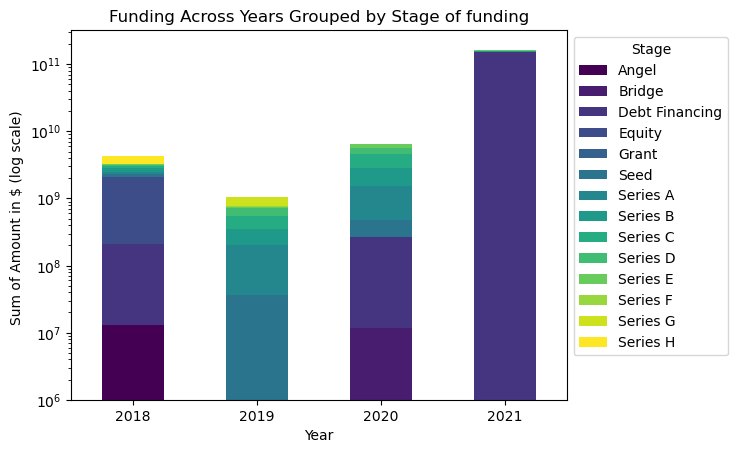

In [84]:
# Group by "Unique_ID" and "Stage", then sum the "Amount" for each combination
sum_by_year_stage = merged_data.groupby(['Year', 'Stage'])['Amount($)'].sum().unstack()

# Plot a grouped bar graph
sum_by_year_stage.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Sum of Amount in $ (log scale) ')
plt.title('Funding Across Years Grouped by Stage of funding')
plt.legend(title='Stage', bbox_to_anchor=(1, 1))
plt.yscale('log') 
plt.xticks(rotation=0)
plt.show()

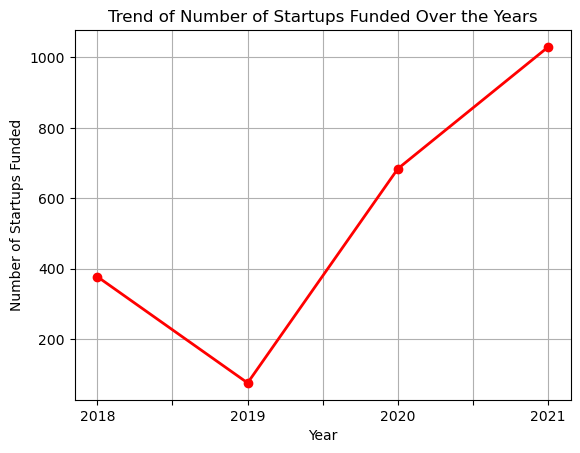

In [85]:
# Group by "Unique_ID" and count the unique companies for each year
startup_counts = merged_data.groupby('Year')['Company_Name'].nunique()

# Plot a line graph
startup_counts.plot(marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Startups Funded')
plt.title('Trend of Number of Startups Funded Over the Years')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

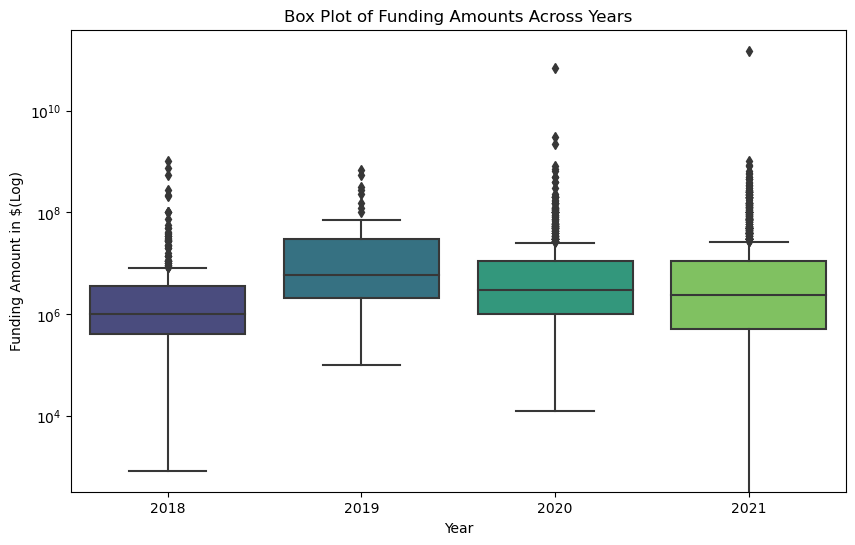

In [86]:
# Create a box plot for funding amounts
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Amount($)', data=merged_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Funding Amount in $(Log)')
plt.yscale('log')
plt.title('Box Plot of Funding Amounts Across Years')
plt.show()

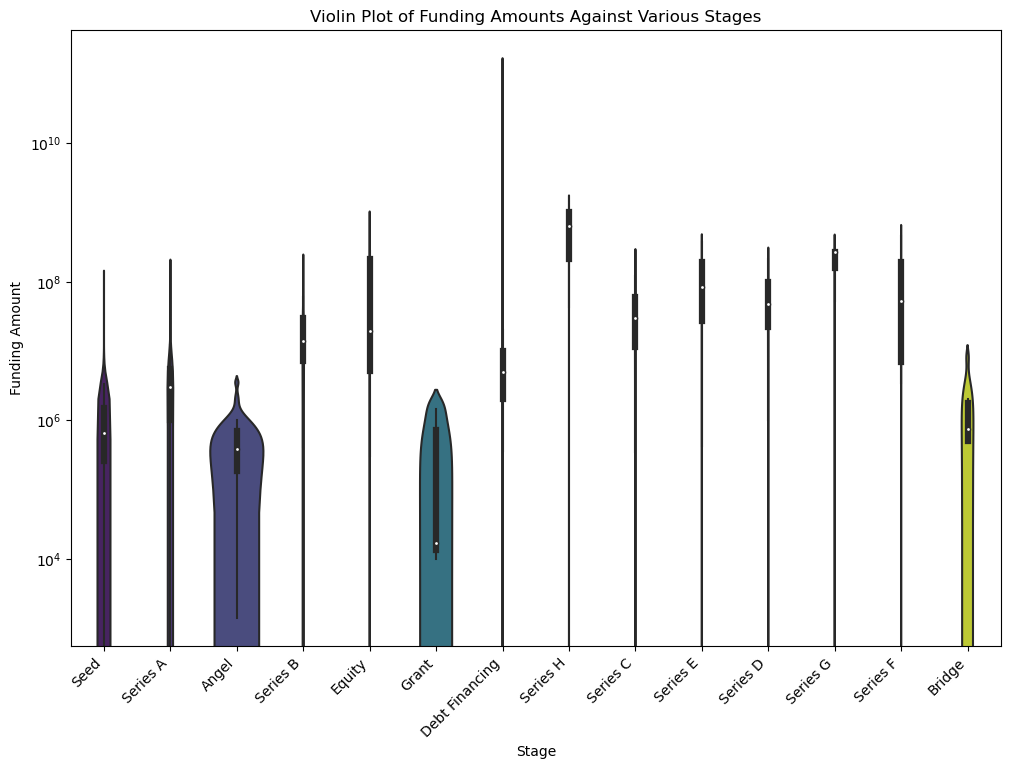

In [87]:
# Create a violin plot for funding amounts against various stages

plt.figure(figsize=(12, 8))
sns.violinplot(x='Stage', y='Amount($)', data=merged_data, palette='viridis')
plt.xlabel('Stage')
plt.ylabel('Funding Amount')
plt.yscale('log')  # Set log scale on the Y-axis for better visualization
plt.title('Violin Plot of Funding Amounts Against Various Stages')
plt.xticks(rotation=45, ha='right')
plt.show()